In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [3]:
D = 1001
N = 10000
p = np.arange(0,D,1)
sqrt2 = np.sqrt(2)
w = 2*np.pi/D
im = complex(0.0,1.0)
omegap = np.exp(im*w*p)

In [4]:
coin_beta = np.pi/2
coin_gamma = np.pi
theta = 2 * np.pi/8
phi = np.pi/2

In [5]:
instate = np.zeros((D,2,2),np.complex128)
pstate = np.zeros((D,2,2),np.complex128)
U = np.zeros((D,2,2),np.complex128)
U[:,0,0] = np.exp(im*coin_gamma) * np.cos(coin_beta/2) * np.exp(-im*p)
U[:,1,0] = -np.exp(im*coin_gamma) * np.sin(coin_beta/2) * np.exp(im*p)
U[:,0,1] = np.sin(coin_beta/2) * np.exp(-im*p)
U[:,1,1] = np.cos(coin_beta/2) * np.exp(im*p)

instate[0,0,0] = np.cos(theta) * np.cos(theta)
instate[0,1,0] = np.cos(theta) * np.sin(theta) * np.exp(im*phi)
instate[0,0,1] = np.cos(theta) * np.sin(theta) * np.exp(im*phi)
instate[0,1,1] = np.sin(theta) * np.sin(theta) * np.exp(2*im*phi)

transf = np.zeros((D,D),np.complex128)

for m in p:
    transf[m,:] = omegap**m
np.multiply(1/np.sqrt(D),transf,out=transf);
np.einsum('pq,qmn -> pmn',transf,instate,out=pstate);

In [6]:
U1 = np.zeros((D,2,2),np.complex128)
U2 = np.zeros((D,2,2),np.complex128)
evop = np.zeros((D,2,2,2,2),np.complex128)
evolved_pstate = np.zeros((D,2,2),np.complex128)
finstate = np.zeros((D,2,2),np.complex128)
pattern_concurrences = np.zeros(N,np.float64)
for k in range(N):
    for m in range(D):
        U1[m,:,:] = np.linalg.matrix_power(U[m,:,:],k)
        U2[m,:,:] = np.linalg.matrix_power(U[m,:,:],N-k)
    np.einsum("pjk,plm->pjklm",U1,U2,out=evop)
    np.einsum("pjklm,pkm->pjl",evop,pstate,out=evolved_pstate)
    np.einsum("pq,pjk->qjk",np.conj(transf),evolved_pstate,out=finstate)
    pattern_concurrences[k] = np.sum(2*np.absolute(np.multiply(finstate[:,0,0],finstate[:,1,1]) - np.multiply(finstate[:,0,1],finstate[:,1,0])),axis=0)

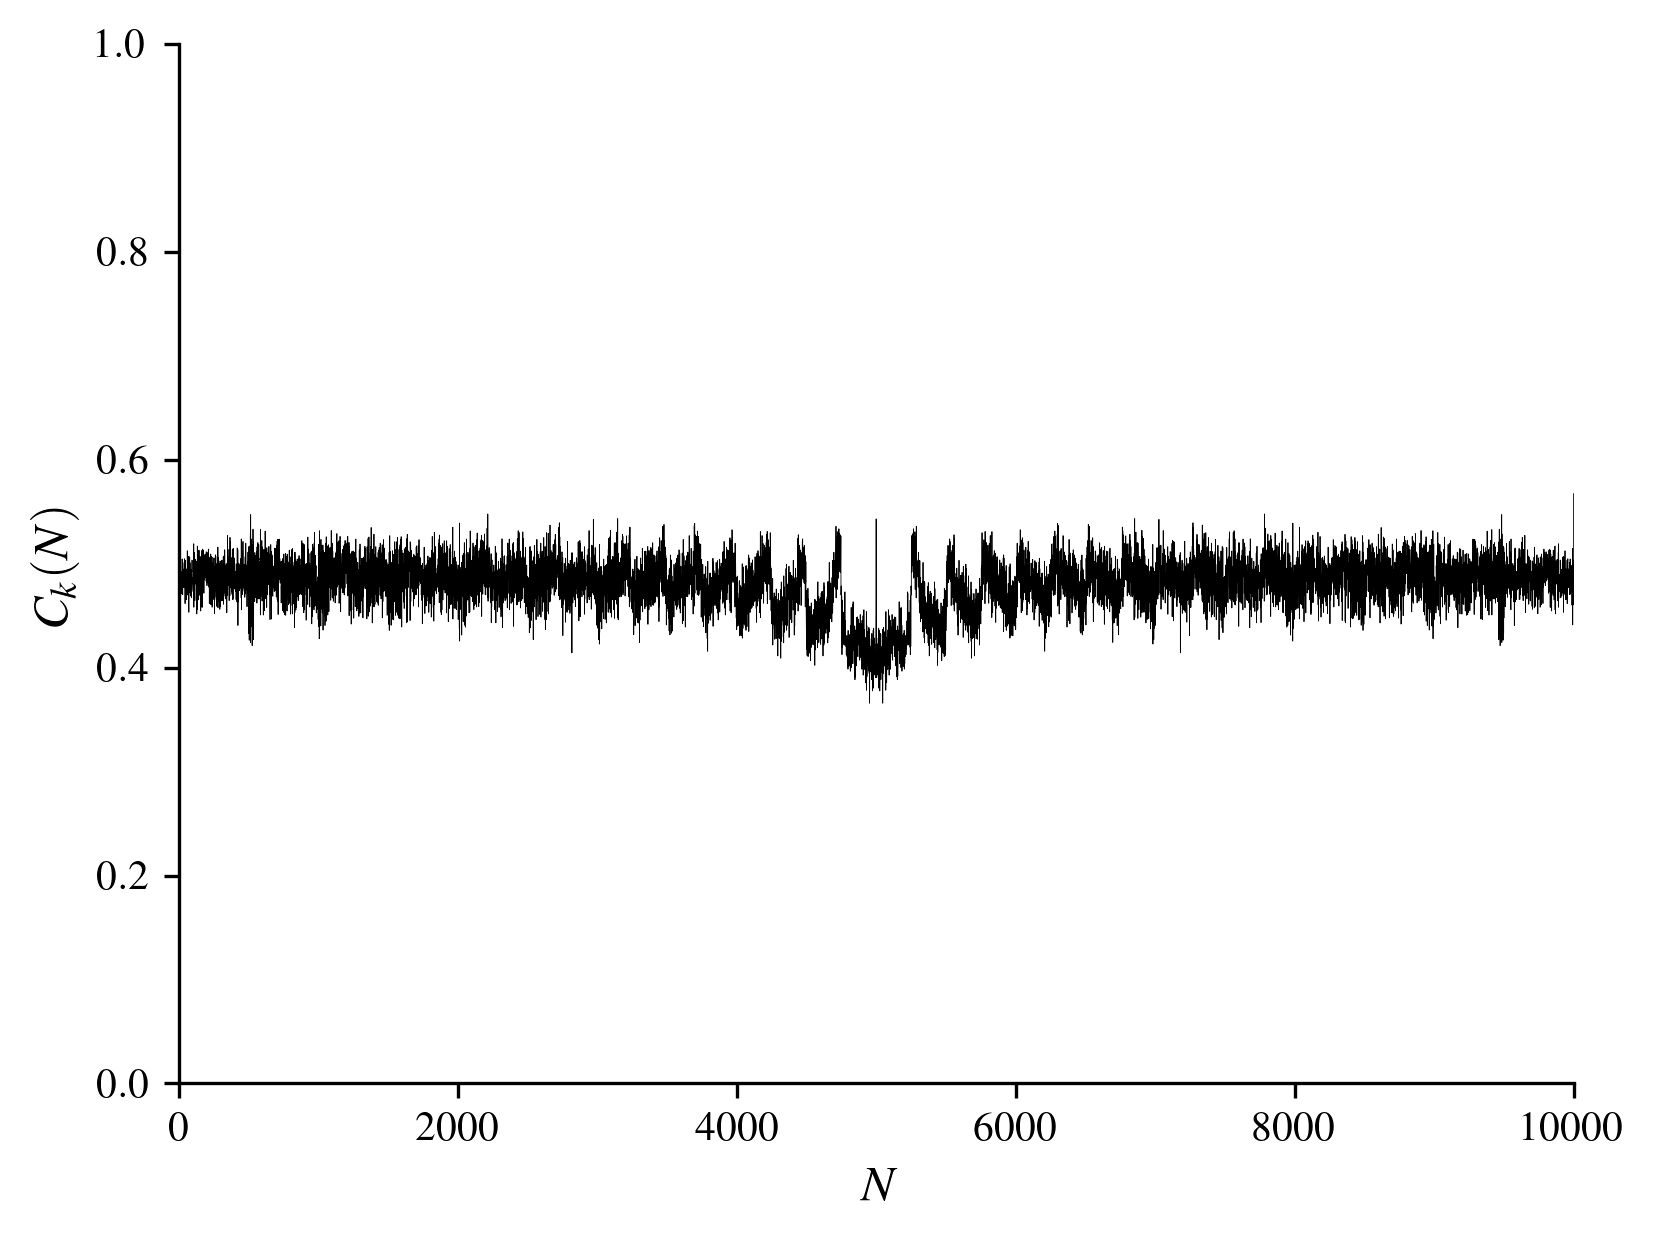

In [7]:
fig = plt.figure(figsize=(6,4.5),dpi=300)
fig.clear()
ax = fig.subplots()
ax.plot(range(N), pattern_concurrences,'k-', lw=0.2)
ax.set_xlim(0,N)
ax.set_xlabel(r'$N$',fontsize=12)
ax.set_ylim(0,1)
# ax.set_ylim(0,7)
ax.set_ylabel(r'$C_k(N)$',fontsize=12)
ax.spines[['right', 'top']].set_visible(False)
